# Install and Import Dependencies


In [6]:
!pip install easyocr
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\Python3.9\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Users\Python3.9\python.exe -m pip install --upgrade pip' command.


# Read in Image,Grayscale and Blur

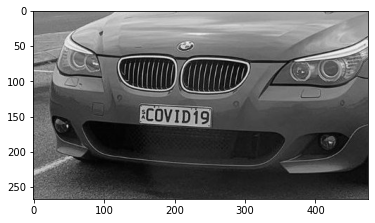

In [34]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
img  =cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


# Apply Filter and find Edges for localization

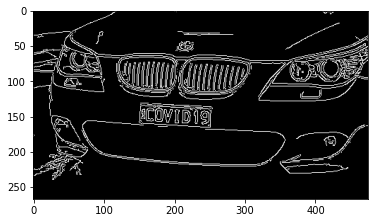

In [35]:
bfilter = cv2.bilateralFilter(gray, 11,17,17) #Noise reduction
edge = cv2.Canny(bfilter, 30,200) #edge detection
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [23]:
keypoints = cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [24]:
location = None
for contour in contours:
 approx = cv2.approxPolyDP(contour, 10, True)
 if len(approx)==4:
     location = approx
     break

In [25]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [26]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

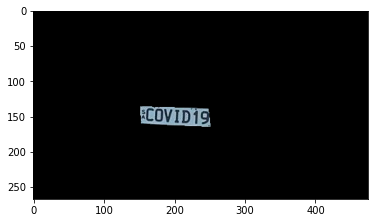

In [27]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [28]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x),np.min(y))
(x2, y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

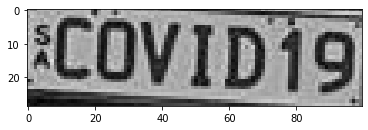

In [29]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR to Read Text

In [32]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275641079442608)]

# 5. Render result

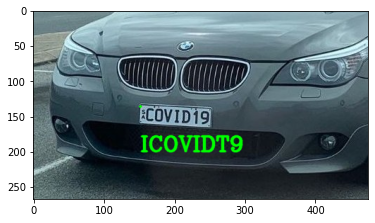

In [33]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0],approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0),thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[0][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))